# tsne on cytoflow data 

### Load important things

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
#from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
import pandas as pd

In [3]:
nSamples = 1000 # 3000

Install fc tools if not available 

In [4]:
!pip install flowcytometrytools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import FlowCytometryTools as fct


### Set up data set 

In [6]:
allData = {}    
nTubes=0

### download test
see sharepoint https://loyolauniversitychicago-my.sharepoint.com/personal/rbonomo_luc_edu/_layouts/15/onedrive.aspx?ct=1574112430084&amp;or=OWA%2DNT&amp;cid=84cffd3c%2D4668%2D6e57%2D91fb%2D4f12520c418c&amp;originalPath=aHR0cHM6Ly9sb3lvbGF1bml2ZXJzaXR5Y2hpY2Fnby1teS5zaGFyZXBvaW50LmNvbS86ZjovZy9wZXJzb25hbC9yYm9ub21vX2x1Y19lZHUvRXZVM3BaT2psYkJGbkxNTHQ4MThad01CeHgyNXMwWVVrVXZTa2dtVC00N2Q4Zz9ydGltZT1UeWxhRW01czEwZw&amp;id=%2Fpersonal%2Frbonomo%5Fluc%5Fedu%2FDocuments%2FJune2019%2Ftsne%2Ffmt

grabbed first couple and moved to /home/pkekeneshuskey/DataLocker/flowcyto/raiza/DIR

DIR=fmt,vehicle

In [7]:
path = "." # on colab

## Function for normalizing data 

In [9]:
def doRenorm(sample,frame):
  frame[frame < 1e-9] = 1e-9      # verify all numbers are positive 
  frame = frame.apply(np.log10)  # convert all into log    
  frame=frame.fillna(0)
  frame[frame<0]=0

  for channel in sample.channel_names:
      print(channel,np.median(frame[channel])) 
  return frame
        

## Load data via pandas

In [10]:
fileNames = ["1906188_Tube_045 4L WD DRG.fcs"]


renorm=True
test=True
nTubes=0
randFromSet = True
key = 'fmt'
frames = []
for fileName in fileNames:
    sample = fct.FCMeasurement(ID='Test Sample', datafile=path+"/" + fileName)

    # making a new dataframe 
    frame = pd.DataFrame(sample.data)
    if renorm:
        frame=doRenorm(sample,frame)
        
    if test:
        frame.values[:]+=3
    frames.append(frame)
    nTubes+=1

# merging several frames into a single data frame 
concat = pd.concat(frames)    


# get a random subset
if randFromSet:
  concat = concat.sample(n=nSamples)    


allData[key]=concat
print(len(concat))


FSC-A 4.467143
FSC-H 4.2041473
FSC-W 5.073928
SSC-A 4.2072406
PE-Texas Red-A 2.6571133
FITC-A 1.8640956
PE-A 3.0091405
APC-A 2.6062953
PE-Cy7-A 1.871923
APC-Cy 5-5-A 1.9176105
Time 3.843625
1000


Text(0, 0.5, 'PE-A')

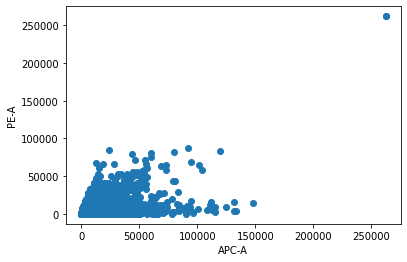

In [11]:
channel1 = 'PE-A' # CD45 
channel2 = 'APC-A' # CD11b
import seaborn as sns
plt.scatter(sample[channel1],sample[channel2])
plt.xlabel(channel2)
plt.ylabel(channel1)

In [12]:
# printing all of the sample names 
print(sample.channel_names) # just as a guide, doesn't contain all data 

('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'PE-Texas Red-A', 'FITC-A', 'PE-A', 'APC-A', 'PE-Cy7-A', 'APC-Cy 5-5-A', 'Time')


In [13]:
# adjust how much data we show
pd.set_option('display.max_rows', 6)


In [14]:
allData['fmt']

,FSC-A,FSC-H,FSC-W,SSC-A,PE-Texas Red-A,FITC-A,PE-A,APC-A,PE-Cy7-A,APC-Cy 5-5-A,Time
4035,7.389485,7.268531,7.937434,7.144776,5.616139,4.838912,5.986848,5.397801,4.579326,4.722634,6.457064
17343,6.986050,6.941263,7.861267,6.312345,4.669503,3.000000,5.091209,4.634679,3.000000,3.000000,7.096802
19166,7.266247,7.140634,7.942093,7.096949,5.341889,4.313867,5.826638,5.134814,4.526081,4.729813,7.142208
...,...,...,...,...,...,...,...,...,...,...,...
17441,7.419556,7.103769,8.132267,7.077969,5.509727,4.592621,5.807312,5.713860,5.230679,5.406880,7.099425
11669,8.417204,7.384944,8.418538,8.418538,6.527400,6.538271,6.744251,7.123919,6.070418,6.427785,6.915859
15890,8.042078,7.319855,8.418538,7.831696,6.252134,5.828415,6.649577,6.173396,5.549959,5.280942,7.056893


### compare stats for full version. 

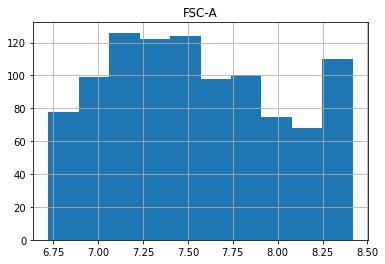

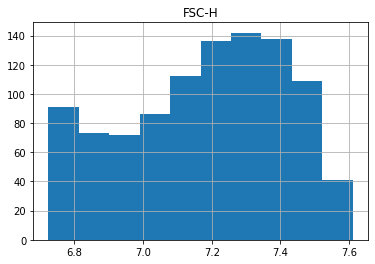

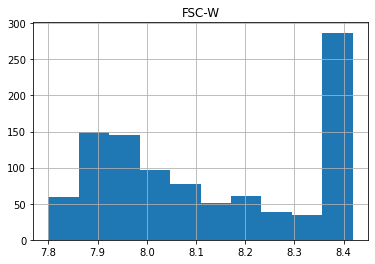

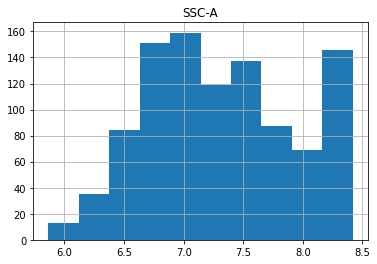

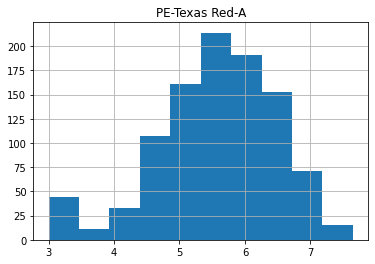

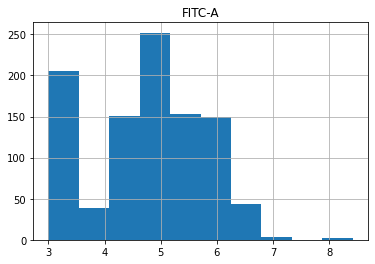

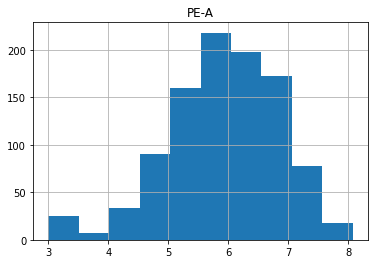

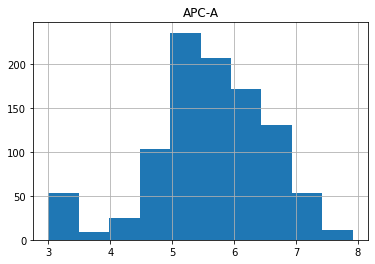

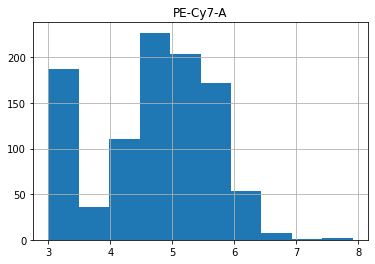

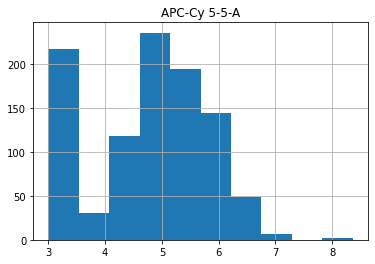

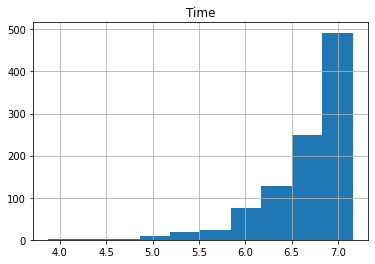

In [15]:
for channel in sample.channel_names:
    plt.figure()
    frame=allData['fmt']
    frame[channel].hist()
    plt.title(channel)


### Grab channels of interest and randomize sets

In [16]:
wantedChannels=[
                'PE-Cy7-A', 'PE-A',
                'PE-Texas Red-A',
                'APC-A','APC-Cy 5-5-A'
               ]
wantedData = frame[wantedChannels]

In [17]:
nRandom = nSamples*nTubes
daData = wantedData.sample(n=nRandom)


### Relabel data for indexing later

In [18]:
Xi = daData
Xi = Xi.sort_index('index')
X = Xi.reset_index()
Xw = X[wantedChannels] # take out other tags; contains only data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


In [19]:
Xw

,PE-Cy7-A,PE-A,PE-Texas Red-A,APC-A,APC-Cy 5-5-A
0,5.605262,7.544591,7.075351,4.922206,4.391641
1,5.390953,6.095302,5.748118,5.600581,5.488551
2,5.803840,7.517923,7.040859,7.423035,6.672998
...,...,...,...,...,...
997,3.000000,3.000000,3.000000,4.500785,4.306211
998,3.942504,4.506776,3.000000,3.722634,3.000000
999,3.000000,3.000000,3.000000,3.000000,3.000000


## tsne
- This is a technique for projecting data into clusters (by their attributes)
- Takes about a minute for ~2K points

In [20]:
tsne = TSNE()
X_embedded = tsne.fit_transform(Xw)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


## Define function for plotting data 

In [21]:
# plot all data (no characteristics)
from scipy.stats import kde

def PlotData(
    X,             # original data
    X_embedded,    # tsne'd data
    channel='SSC-A',# which channel to select for
    channelThresh = 0, # threshold 
    allData = True # display 'all' data on background, plot 'key' data on foreground
    ):
    
    # plot background     
    plt.figure()
    if allData:
      nbins=300
      x,y = X_embedded[:,0], X_embedded[:,1]
      k = kde.gaussian_kde([x,y])
      xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
      zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
      # Make the plot
      plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap="binary")
  
      #sns.scatterplot(X_`embedded[:,0], X_embedded[:,1],
       #             facecolors='gray') # , characteristic)

    # grab subset satisfying a criterion 
    subset = X.loc[ 
        X[channel] > channelThresh   # just for testing 
    ]
    idxSubset= subset.index.values  
    characteristic = subset[channel]
    #print(characteristic)

    # plot data 
    xAxis = X_embedded[idxSubset,0]
    yAxis = X_embedded[idxSubset,1]
    sns.scatterplot(X_embedded[idxSubset],x=xAxis,y=yAxis,hue=characteristic)#,hue_norm=True)    
    plt.title("%s/%s"%(key,channel))
    



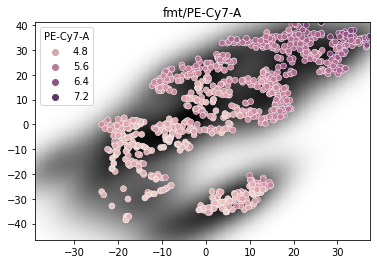

In [23]:
channel = "PE-Cy7-A"
PlotData(X,X_embedded,channel=channel, channelThresh=4,allData=True)#
